In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r'C:\Users\The ChainSmokers\MY PROJECTS\Stock Market\Stocks\aapl.us.txt')

In [3]:
data.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,1984-09-07,0.42388,0.42902,0.41874,0.42388,23220030,0
1,1984-09-10,0.42388,0.42516,0.41366,0.42134,18022532,0
2,1984-09-11,0.42516,0.43668,0.42516,0.42902,42498199,0
3,1984-09-12,0.42902,0.43157,0.41618,0.41618,37125801,0
4,1984-09-13,0.43927,0.44052,0.43927,0.43927,57822062,0


In [4]:
data.shape

(8364, 7)

In [5]:
data.tail()

,Date,Open,High,Low,Close,Volume,OpenInt
8359,2017-11-06,171.75,174.36,171.10,173.63,34901241,0
8360,2017-11-07,173.29,174.51,173.29,174.18,24424877,0
8361,2017-11-08,174.03,175.61,173.71,175.61,24451166,0
8362,2017-11-09,174.48,175.46,172.52,175.25,29533086,0
8363,2017-11-10,175.11,175.38,174.27,174.67,25130494,0


In [6]:
data.drop(['OpenInt','Volume'], inplace=True, axis=1)

In [7]:
data.head()

,Date,Open,High,Low,Close
0,1984-09-07,0.42388,0.42902,0.41874,0.42388
1,1984-09-10,0.42388,0.42516,0.41366,0.42134
2,1984-09-11,0.42516,0.43668,0.42516,0.42902
3,1984-09-12,0.42902,0.43157,0.41618,0.41618
4,1984-09-13,0.43927,0.44052,0.43927,0.43927


In [8]:
train_dates = pd.to_datetime(data['Date'])

In [9]:
train_dates.tail()

8359   2017-11-06
8360   2017-11-07
8361   2017-11-08
8362   2017-11-09
8363   2017-11-10
Name: Date, dtype: datetime64[ns]

In [10]:
data['Date']=pd.to_datetime(data['Date'])

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8364 entries, 0 to 8363
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    8364 non-null   datetime64[ns]
 1   Open    8364 non-null   float64       
 2   High    8364 non-null   float64       
 3   Low     8364 non-null   float64       
 4   Close   8364 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 326.8 KB


In [12]:
data.set_index('Date',inplace=True)

In [13]:
data

,Open,High,Low,Close
Date,,,,
1984-09-07,0.42388,0.42902,0.41874,0.42388
1984-09-10,0.42388,0.42516,0.41366,0.42134
1984-09-11,0.42516,0.43668,0.42516,0.42902
1984-09-12,0.42902,0.43157,0.41618,0.41618
1984-09-13,0.43927,0.44052,0.43927,0.43927
...,...,...,...,...
2017-11-06,171.75000,174.36000,171.10000,173.63000
2017-11-07,173.29000,174.51000,173.29000,174.18000
2017-11-08,174.03000,175.61000,173.71000,175.61000


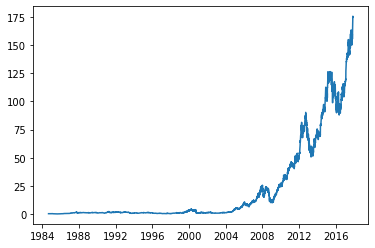

In [14]:
plt.plot(data['Close'])

In [15]:
data.shape

(8364, 4)

In [16]:
import numpy as np

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scalar= StandardScaler()

In [19]:
scalar.fit(data)

StandardScaler()

In [20]:
data_scaled=scalar.transform(data)

In [21]:
len(data_scaled)

8364

## Splitting our Time Series train-test data

In [22]:
##splitting dataset into train and test split
training_size=int(len(data_scaled)*0.75)
test_size=len(data_scaled)-training_size
train_data,test_data=data_scaled[0:training_size,:],data_scaled[training_size:len(data_scaled),:]

In [23]:
test_data.shape

(2091, 4)

In [24]:
train_data.shape

(6273, 4)

In [25]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), :]   
        dataX.append(a)
        dataY.append(dataset[i + time_step, 3])
    return numpy.array(dataX), numpy.array(dataY)

In [26]:
X_train, y_train = create_dataset(train_data, time_step=100)

In [27]:
X_train.shape

(6172, 100, 4)

In [28]:
y_train

array([-0.57738641, -0.57775874, -0.57792796, ..., -0.07624071,
       -0.05849811, -0.05481718])

In [29]:
y_train = y_train.reshape(-1,1)

In [30]:
y_train.shape

(6172, 1)

In [31]:
X_test, y_test = create_dataset(test_data, time_step = 200)

In [32]:
X_test.shape

(1890, 200, 4)

In [33]:
y_test = y_test.reshape(-1,1)

In [34]:
y_test.shape

(1890, 1)

In [35]:
X_train, y_train, X_test, y_test = np.array(X_train), np.array(y_train), np.array(X_test), np.array(y_test)

In [36]:
import tensorflow

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Bidirectional

In [38]:
model=Sequential()
model.add(Bidirectional(LSTM(100,return_sequences=True,input_shape=(200,4))))
model.add(Bidirectional(LSTM(50,return_sequences=False)))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [39]:
history = model.fit(X_train,y_train, validation_data=(X_test,y_test),epochs=10,batch_size=64,verbose=1)

In [40]:
model.save('bad.h5')

## 90 days prediction 

In [41]:
n_future = 90

In [42]:
forcast_dates = pd.date_range(list(train_dates)[-1], periods=n_future, freq='1d').tolist()

In [43]:
forcast_dates

[Timestamp('2017-11-10 00:00:00', freq='D'),
 Timestamp('2017-11-11 00:00:00', freq='D'),
 Timestamp('2017-11-12 00:00:00', freq='D'),
 Timestamp('2017-11-13 00:00:00', freq='D'),
 Timestamp('2017-11-14 00:00:00', freq='D'),
 Timestamp('2017-11-15 00:00:00', freq='D'),
 Timestamp('2017-11-16 00:00:00', freq='D'),
 Timestamp('2017-11-17 00:00:00', freq='D'),
 Timestamp('2017-11-18 00:00:00', freq='D'),
 Timestamp('2017-11-19 00:00:00', freq='D'),
 Timestamp('2017-11-20 00:00:00', freq='D'),
 Timestamp('2017-11-21 00:00:00', freq='D'),
 Timestamp('2017-11-22 00:00:00', freq='D'),
 Timestamp('2017-11-23 00:00:00', freq='D'),
 Timestamp('2017-11-24 00:00:00', freq='D'),
 Timestamp('2017-11-25 00:00:00', freq='D'),
 Timestamp('2017-11-26 00:00:00', freq='D'),
 Timestamp('2017-11-27 00:00:00', freq='D'),
 Timestamp('2017-11-28 00:00:00', freq='D'),
 Timestamp('2017-11-29 00:00:00', freq='D'),
 Timestamp('2017-11-30 00:00:00', freq='D'),
 Timestamp('2017-12-01 00:00:00', freq='D'),
 Timestamp

In [44]:
from tensorflow.keras.models import load_model

In [45]:
bad = load_model('good.h5')

In [59]:
forcast = bad.predict(X_test)

In [60]:
forcast

array([[0.25048453],
       [0.25324255],
       [0.25657594],
       ...,
       [2.198178  ],
       [2.2063713 ],
       [2.2134283 ]], dtype=float32)

In [61]:
forcast_copies = np.repeat(forcast, 4, axis=-1)

In [62]:
y_pred_future = scalar.inverse_transform(forcast_copies)[:,0]

In [64]:
y_pred_future

array([ 31.742933,  31.847078,  31.972952, ..., 105.29007 , 105.59946 ,
       105.86594 ], dtype=float32)

In [67]:
y_original = scalar.inverse_transform(X_test)[:,3]

In [68]:
y_original

array([[ 20.708,  21.092,  20.682,  20.849],
       [ 20.874,  21.13 ,  20.861,  20.924],
       [ 21.148,  21.339,  21.114,  21.314],
       ...,
       [120.21 , 120.42 , 119.68 , 120.02 ],
       [119.02 , 119.7  , 118.75 , 119.7  ],
       [119.23 , 119.47 , 118.71 , 119.43 ]])